In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.metrics import classification_report

In [75]:
file_path = "data exploration/explored_data.csv"  
data = pd.read_csv(file_path)

print(data.head())

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Time  Pictures  Review_Count  Follower_Count  Review_Length  
0  2019-05-25 15:54:00         0           1.0             2.0            222  
1  2019-05-25 14:20:00         0           3.0             2.0            144  
2  2019-05-24 22:54:00         0           2.0             3.0            189  
3  2019-05-24 22:11:00        

In [76]:
print(data['Review'].isnull().sum())
print(data['Rating'].isnull().sum())

45
0


In [77]:
data['Review'] = data['Review'].fillna("")

In [78]:
count=CountVectorizer()
porter = PorterStemmer()

In [79]:
three_star_reviews = data[data['Rating'] == 3]  # Select only 3-star reviews
for review in three_star_reviews['Review']:
    print("\n" + "-"*50)  # Separator for clarity
    print(review)


--------------------------------------------------
Short review: Decent breads and starters, bad Shaam Savera, a little screwed up daal makhni (but should be a one-off case)
Better ambience at night... And importantly good quantity!
I wanted to give a 2.5 but that's not an option 🙈
Extensive...
Ambience: It's better at night. Friends who had been here during the day didn't like it much. So if you prefer ambience, go at night!
Food! Ordered a Hara Bhara Kebab, Shaam Savera, Daal Makhni, rotis and raita (Yes! I'm a vegetarian 🙈)
The good part! Quantity 😍
I was excited to see Shaam Savera on their menu. But take it from me, you do not want to order it. It is no where close to what it should be. They messed it up real bad, especially the colors.
The daal makhni had big chunks of garlic cloves which spoiled it for me. It wasn't creamy too :(
The breads and raita were decent!
The Hara Bhara Kebabs were decent too, soft! They had an extra outer coating of peanuts. So if you're not a peanut f

In [114]:
# data['Sentiment'] = (data['Rating'] >= 3).astype(int)

labeled_data = data[data['Rating'] != 3]
X_train = labeled_data['Review']
y_train = (labeled_data['Rating'] >= 4).astype(int)  # 1 = Positive, 0 = Negative

# Train SVM Classifier
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,2))),
    ('classifier', SVC()) 
])
pipeline.fit(X_train, y_train)

# Predict sentiment for 3-star reviews
data.loc[data['Rating'] == 3, 'Sentiment'] = pipeline.predict(data[data['Rating'] == 3]['Review'])

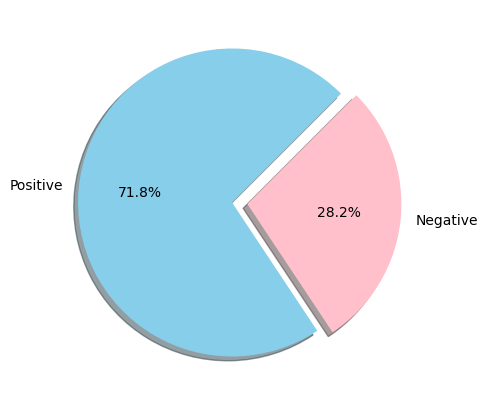

In [115]:
fig=plt.figure(figsize=(5,5))
# Define colors for the pie chart segments
colors=["skyblue",'pink']
# Filter data to separate positive and negative labels
pos=data[data['Sentiment']==1]
neg=data[data['Sentiment']==0]
# Count the number of positive and negative instances
ck=[pos['Sentiment'].count(),neg['Sentiment'].count()]
# Create a pie chart with the counts of positive and negative instances
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [116]:
import pandas as pd

# Select 3-star reviews along with their predicted sentiment
three_star_reviews = data[data['Rating'] == 3][['Review', 'Sentiment']]

# Display the reviews with their predicted sentiment
for index, row in three_star_reviews.iterrows():
    print("\n" + "-"*80)  # Separator for clarity
    print(f"Review: {row['Review']}")
    print(f"Predicted Sentiment: {'Positive' if row['Sentiment'] == 1 else 'Negative'}")



--------------------------------------------------------------------------------
Review: Short review: Decent breads and starters, bad Shaam Savera, a little screwed up daal makhni (but should be a one-off case)
Better ambience at night... And importantly good quantity!
I wanted to give a 2.5 but that's not an option 🙈
Extensive...
Ambience: It's better at night. Friends who had been here during the day didn't like it much. So if you prefer ambience, go at night!
Food! Ordered a Hara Bhara Kebab, Shaam Savera, Daal Makhni, rotis and raita (Yes! I'm a vegetarian 🙈)
The good part! Quantity 😍
I was excited to see Shaam Savera on their menu. But take it from me, you do not want to order it. It is no where close to what it should be. They messed it up real bad, especially the colors.
The daal makhni had big chunks of garlic cloves which spoiled it for me. It wasn't creamy too :(
The breads and raita were decent!
The Hara Bhara Kebabs were decent too, soft! They had an extra outer coating o

Positive words are as follows


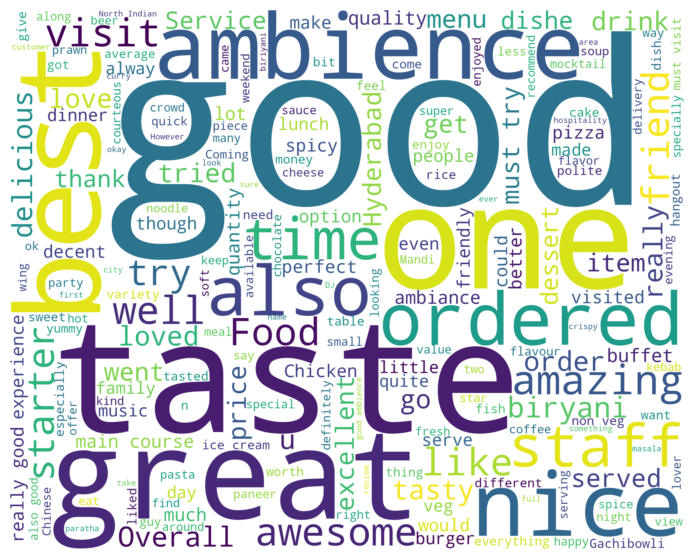

Negative words are as follows


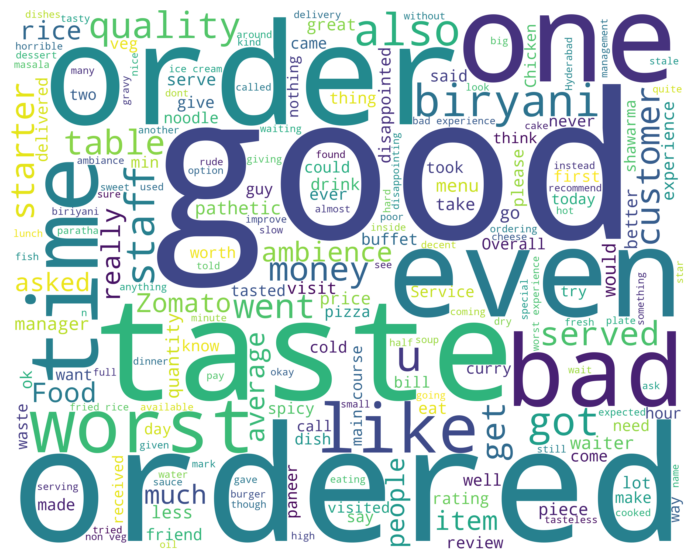

In [117]:
positivedata = data[data['Sentiment'] == 1]['Review']
negdata = data[data['Sentiment'] == 0]['Review']

def wordcloud_draw(data, color='white'):
    words = ' '.join(data)
    words = re.sub(r'(?:restaurant|food|place|service|chicken)', '', words)  # Removing common words
    cleaned_words = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords=stop,
                          background_color=color,
                          width=2500,
                          height=2000).generate(cleaned_words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

print("Positive words are as follows")
wordcloud_draw(positivedata, 'white')

print("Negative words are as follows")
wordcloud_draw(negdata)

In [119]:
def preprocess_text(text):
  text = re.sub(r'\d+', '', text)  # remove numbers 
  text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
  emojis = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)  # find emojis
  # remove non-word characters and add the emojis
  text = re.sub(r'\W+', ' ', text) + " " + " ".join(emojis).replace('-', '')  
  return text.strip()

In [120]:
first_review = data["Review"].iloc[0]
print(first_review)
processed_review = preprocess_text(first_review)
print(processed_review)

The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.
the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful


In [121]:
def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]

In [122]:
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/yty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
tfidf = TfidfVectorizer(
    strip_accents=None,
    lowercase=True,
    stop_words=stop,
    preprocessor=preprocess_text,
    tokenizer=tokenizer_porter,
    use_idf=True,
    norm='l2',
    smooth_idf=True
)

In [128]:
y = data.Sentiment.values

# applying td-idf
x = tfidf.fit_transform(data.Review)

/Users/yty/Library/Python/3.10/lib/python/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/yty/Library/Python/3.10/lib/python/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'hi', 'id', 'ill', 'im', 'isnt', 'itd', 'itll', 'ive', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shed', 'shell', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'theyd', 'theyll', 'theyr', 'theyv', 'thi', 'veri', 'wa', 'wasnt', 'wed', 'well', 'werent', 'weve', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  warnings.warn(


In [130]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5, shuffle=False)

In [139]:
# Train Logistic Regression with SGD
clf_log = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True)
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)
print("Logistic Loss Accuracy:", metrics.accuracy_score(y_test, y_pred_log))

Logistic Loss Accuracy: 0.9034


In [140]:
# Train Linear SVM with SGD, hinge loss
clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, class_weight='balanced')
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8904


In [142]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1436
           1       0.90      0.97      0.93      3564

    accuracy                           0.90      5000
   macro avg       0.91      0.85      0.87      5000
weighted avg       0.90      0.90      0.90      5000

SVM Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1436
           1       0.93      0.92      0.92      3564

    accuracy                           0.89      5000
   macro avg       0.86      0.87      0.87      5000
weighted avg       0.89      0.89      0.89      5000



In [144]:
# average sentiment score per restaurant
sentiment_scores = data.groupby("Restaurant")["Sentiment"].mean().reset_index()
sentiment_scores.rename(columns={"Sentiment": "Sentiment_Score"}, inplace=True)
print(sentiment_scores.head())

sentiment_scores.to_csv("sentiment_scores.csv", index=False)

                       Restaurant  Sentiment_Score
0               10 Downing Street             0.86
1                        13 Dhaba             0.67
2  3B's - Buddies, Bar & Barbecue             0.94
3       AB's - Absolute Barbecues             0.98
4               Absolute Sizzlers             0.68
